In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request

<ipython-input-2-37777429a894>:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
cities = [
    "boston",
    "new-york",
    "san-diego",
    "san-francisco",
    "chicago",
    "pittsburgh",
    "baltimore",
    "portland",
    "houston",
]

In [5]:
all_dfs = []
for city in ["us-average"]+ cities:
    city_df = pd.read_csv(DATA_DIR / "CPI" / "{}-all-items.csv".format(city))
    city_df["CITY"] = city
    city_df["CPI"] = city_df["Value"]
    all_dfs.append(city_df)
CPI_all_df_stacked = pd.concat(all_dfs)
CPI_all_df = (
    CPI_all_df_stacked[["Year", "CPI", "CITY"]]
    .groupby(["Year", "CITY"])
    .describe()[["CPI"]]["CPI"]["mean"]
)
CPI_all_df = pd.DataFrame(CPI_all_df).reset_index()
CPI_all_df = CPI_all_df.pivot(index="Year", columns="CITY", values="mean")
CPI_all_df[:3]

CITY,baltimore,boston,chicago,houston,new-york,pittsburgh,portland,san-diego,san-francisco,us-average
Year,,,,,,,,,,
1984,104.55,104.70,103.80,102.70,104.80,104.55,102.85,104.75,104.00,103.883333
1985,108.20,109.40,107.75,104.90,108.70,106.90,106.70,110.35,108.35,107.566667
1986,110.90,112.25,110.00,103.95,112.25,108.25,108.20,113.50,111.65,109.608333


In [6]:
CPI_all_df

CITY,baltimore,boston,chicago,houston,new-york,pittsburgh,portland,san-diego,san-francisco,us-average
Year,,,,,,,,,,
1984,104.5500,104.7000,103.8000,102.7000,104.8000,104.5500,102.8500,104.7500,104.0000,103.883333
1985,108.2000,109.4000,107.7500,104.9000,108.7000,106.9000,106.7000,110.3500,108.3500,107.566667
1986,110.9000,112.2500,110.0000,103.9500,112.2500,108.2500,108.2000,113.5000,111.6500,109.608333
1987,114.2000,117.1500,114.4500,106.5000,117.9500,111.4000,110.9000,117.4500,115.4000,113.625000
1988,119.3000,124.1500,119.0000,109.5500,123.7000,114.9000,114.7500,123.4500,120.5000,118.258333
1989,124.5000,131.2500,125.0000,114.1000,130.6000,120.1000,120.4500,130.6000,126.3500,123.966667
1990,130.8000,138.9000,131.7000,120.6000,138.5500,126.2000,127.3500,138.4000,132.0500,130.658333
1991,136.3500,144.9500,137.0500,125.1500,144.8000,131.3500,133.9500,143.4500,137.9500,136.191667
1992,140.1000,148.6000,141.0500,129.1000,150.0500,135.9500,139.8500,147.3500,142.5000,140.316667


In [7]:
CPI_all_df_stacked[:3]

,Series ID,Year,Period,Label,Value,CITY,CPI
0,CUUR0000SA0,1984,M01,1984 Jan,101.9,us-average,101.9
1,CUUR0000SA0,1984,M02,1984 Feb,102.4,us-average,102.4
2,CUUR0000SA0,1984,M03,1984 Mar,102.6,us-average,102.6


In [8]:
CPI_relative_average = pd.DataFrame(CPI_all_df.values.T / CPI_all_df['us-average'].values).T
CPI_relative_average.columns = CPI_all_df.columns
CPI_relative_average.index = CPI_all_df.index
CPI_relative_average= CPI_relative_average.reset_index()
CPI_relative_average[:3]

CITY,Year,baltimore,boston,chicago,houston,new-york,pittsburgh,portland,san-diego,san-francisco,us-average
0,1984,1.006417,1.007861,0.999198,0.988609,1.008824,1.006417,0.990053,1.008343,1.001123,1.0
1,1985,1.005888,1.017044,1.001704,0.975209,1.010536,0.993802,0.991943,1.025875,1.007282,1.0
2,1986,1.011784,1.024101,1.003573,0.948377,1.024101,0.987607,0.987151,1.035505,1.018627,1.0


In [9]:
CPI_all_df = CPI_all_df.reset_index()

In [10]:
import seaborn as sns

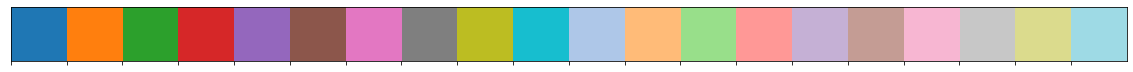

In [11]:
colors = ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#a9a9a9', '#ffffff', '#000000']
colors = sns.color_palette('tab20', 20)[::2] + sns.color_palette('tab20', 20)[1::2]
sns.palplot(colors)

In [12]:
city_color_dict = {'boston': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'new-york': (1.0, 0.4980392156862745, 0.054901960784313725),
 'san-diego': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'san-francisco': (0.8392156862745098,
  0.15294117647058825,
  0.1568627450980392),
 'chicago': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'pittsburgh': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'baltimore': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'portland': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 'houston': (0.7372549019607844, 0.7411764705882353, 0.13333333333333333)}

In [13]:
from postdocsalary.paths import save_fig, FIGURE_DIR

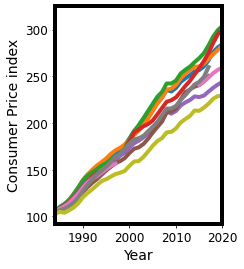

In [14]:
fig, ax = plt.subplots(figsize=(3, 4))
for city in cities:
    ax.plot(
        CPI_all_df.Year.values,
        CPI_all_df[city].values,
        label=city,
        lw=4,
        color = city_color_dict[city],
    )
#ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Consumer Price index", fontsize=14)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.set_xlim([1984, 2020])
save_fig(FIGURE_DIR / 'CPI')

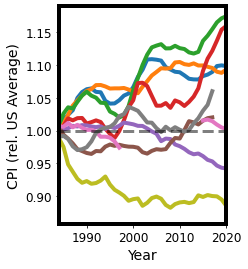

In [15]:
fig, ax = plt.subplots(figsize=(3, 4))
for city in cities:
    ax.plot(
        CPI_relative_average.Year.values,
        CPI_relative_average[city].values,
        label=city,
        lw=4,
        alpha = 1,
        color = city_color_dict[city],
    )
#ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")

ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("CPI (rel. US Average)", fontsize=14)
ax.set_xlim([1984, 2020])

ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.axhline(1, ls = 'dashed', lw=3, alpha = 0.5, color = 'k')
save_fig(FIGURE_DIR / 'CPI_rel_avg')

### Home prices

In [16]:
regions = [
    "Boston city",
    "New York County",
    "Cook County",
    "Allegheny County",
    "San Diego County",
    "San Francisco County",
    "Baltimore County",
    "Multnomah County",
    "Harris County",
    "Washtenaw County",
    "Durham County"
]

In [17]:
cba_subs = [
    "METRO41740M41740",
    "METRO41860MM7360",
    "METRO16980M16980",
    "METRO14460MM1120",
    "METRO35620MM5600",
    "METRO38300M38300",
    "METRO20500M20500",
    "METRO38900M38900",
    "METRO11460M11460",
    "METRO38900M38900",
    "METRO26420M26420",
    "METRO12580M12580"
]

In [18]:
file = DATA_DIR / 'rent' / "FMR_2Bed_1983_2022_2.csv"

home_prices = pd.read_csv(file,encoding='latin1')

In [19]:
home_prices[:3]

,fips2010,fips2000,areaname22,name,msa22,fmr22_2,fmr22,msa21,fmr21_2,fmr21,...,fmr83,cbsasub,areaname,state,cousub,county,pop2010,census_region,pop2017,pop2000
0,100199999,100199999.0,"Montgomery, AL MSA",Autauga County,METRO33860M33860,914,40,METRO33860M33860,908,40,...,45.0,METRO33860M33860,"Montgomery, AL MSA",1.0,99999.0,1.0,54571,3.0,55035,43671.0
1,100399999,100399999.0,"Daphne-Fairhope-Foley, AL MSA",Baldwin County,METRO19300M19300,1017,40,METRO19300M19300,922,40,...,45.0,METRO19300M19300,"Daphne-Fairhope-Foley, AL MSA",1.0,99999.0,3.0,182265,3.0,203360,140415.0
2,100599999,100599999.0,"Barbour County, AL",Barbour County,NCNTY01005N01005,705,40,NCNTY01005N01005,648,40,...,45.0,NCNTY01005N01005,"Barbour County, AL",1.0,99999.0,5.0,27457,3.0,26200,29038.0


In [20]:
def get_year(x):
    year = x.split('_')[0][-2:]
    if int(year) < 80:
        year = int("20"+year)
    else:
        year = int("19"+year)
    return year

In [21]:
# melt for year
home_prices_all_melt = home_prices.melt(id_vars="areaname22", value_vars = home_prices.columns[4:-7])
home_prices_all = home_prices_all_melt[np.array([i[-2:] == '_2' for i in home_prices_all_melt.variable.values])]
home_prices_all['Year'] = [get_year(i) for i in home_prices_all.variable.values]
home_prices_all[:3]

<ipython-input-21-078faac182e1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_prices_all['Year'] = [get_year(i) for i in home_prices_all.variable.values]


,areaname22,variable,value,Year
4765,"Montgomery, AL MSA",fmr22_2,914,2022
4766,"Daphne-Fairhope-Foley, AL MSA",fmr22_2,1017,2022
4767,"Barbour County, AL",fmr22_2,705,2022


In [22]:
home_prices_all = home_prices_all.merge(home_prices[['pop2000', 'areaname22']], on="areaname22")

In [23]:
year_mean = {
    year: np.nanmean(home_prices_all[home_prices_all.Year == year].value.values.astype(float))
    for year in home_prices_all.Year.unique()
}

In [24]:
home_prices_regions = home_prices[home_prices.name.isin(regions)]
home_prices_regions = home_prices_regions[home_prices_regions.cbsasub.isin(cba_subs)]
# melt for year
home_prices_regions_melt = home_prices_regions.melt(
    id_vars="areaname22", value_vars=home_prices_regions.columns[4:-7]
)
home_prices_regions = home_prices_regions_melt[
    np.array([i[-2:] == "_2" for i in home_prices_regions_melt.variable.values])
]
home_prices_regions["Year"] = [get_year(i) for i in home_prices_regions.variable.values]
home_prices_regions["relative_price"] = [
    row.value / year_mean[row.Year] for idx, row in home_prices_regions.iterrows()
]
home_prices_regions

<ipython-input-24-ae14d8424f2a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_prices_regions["Year"] = [get_year(i) for i in home_prices_regions.variable.values]
<ipython-input-24-ae14d8424f2a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_prices_regions["relative_price"] = [


,areaname22,variable,value,Year,relative_price
11,"San Diego-Carlsbad, CA MSA",fmr22_2,1979,2022,1.534985
12,"San Francisco, CA HUD Metro FMR Area",fmr22_2,3198,2022,2.480486
13,"Chicago-Joliet-Naperville, IL HUD Metro FMR Area",fmr22_2,1340,2022,1.039353
14,"Baltimore-Columbia-Towson, MD MSA",fmr22_2,1395,2022,1.082013
15,"Boston-Cambridge-Quincy, MA-NH HUD Metro FMR Area",fmr22_2,2205,2022,1.710279
...,...,...,...,...,...
1271,"New York, NY HUD Metro FMR Area",fmr83_2,420.0,1983,1.048358
1272,"Durham-Chapel Hill, NC HUD Metro FMR Area",fmr83_2,372.0,1983,0.928546
1273,"Portland-Vancouver-Hillsboro, OR-WA MSA",fmr83_2,369.0,1983,0.921058
1274,"Pittsburgh, PA HUD Metro FMR Area",fmr83_2,372.0,1983,0.928546


In [25]:
region_dict = {
    "San Diego-Carlsbad, CA MSA": (
        0.17254901960784313,
        0.6274509803921569,
        0.17254901960784313,
    ),
    "San Francisco, CA HUD Metro FMR Area": (
        0.8392156862745098,
        0.15294117647058825,
        0.1568627450980392,
    ),
    "Chicago-Joliet-Naperville, IL HUD Metro FMR Area": (
        0.5803921568627451,
        0.403921568627451,
        0.7411764705882353,
    ),
    "Baltimore-Columbia-Towson, MD MSA": (
        0.8901960784313725,
        0.4666666666666667,
        0.7607843137254902,
    ),
    "Boston-Cambridge-Quincy, MA-NH HUD Metro FMR Area": (
        0.12156862745098039,
        0.4666666666666667,
        0.7058823529411765,
    ),
    "Ann Arbor, MI MSA": (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
    "New York, NY HUD Metro FMR Area": (1.0, 0.4980392156862745, 0.054901960784313725),
    "Durham-Chapel Hill, NC HUD Metro FMR Area": (
        0.6823529411764706,
        0.7803921568627451,
        0.9098039215686274,
    ),
    "Portland-Vancouver-Hillsboro, OR-WA MSA": (
        0.4980392156862745,
        0.4980392156862745,
        0.4980392156862745,
    ),
    "Pittsburgh, PA HUD Metro FMR Area": (
        0.5490196078431373,
        0.33725490196078434,
        0.29411764705882354,
    ),
    "Houston-The Woodlands-Sugar Land, TX HUD Metro FMR Area": (
        0.7372549019607844,
        0.7411764705882353,
        0.13333333333333333,
    ),
}

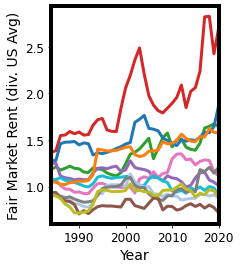

In [29]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(3, 4))
sns.lineplot(
    data=home_prices_regions,
    x="Year",
    y="relative_price",
    hue="areaname22",
    ax=ax,
    lw=3,
    palette=region_dict,
    legend=False
)
#ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
ax.set_xlim([1984, 2020])
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel("Fair Market Rent (div. US Avg)", fontsize=14)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
save_fig(FIGURE_DIR / 'fair-market-rent-relative')

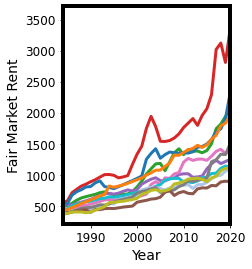

In [27]:
fig, ax = plt.subplots(figsize=(3, 4))
sns.lineplot(
    data=home_prices_regions, x="Year", y="value", hue="areaname22", ax=ax,
    lw=3,
    palette=region_dict,
    legend=False
)
#ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
ax.set_xlim([1984, 2020])
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel("Fair Market Rent", fontsize=14)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
save_fig(FIGURE_DIR / 'fair-market-rent')

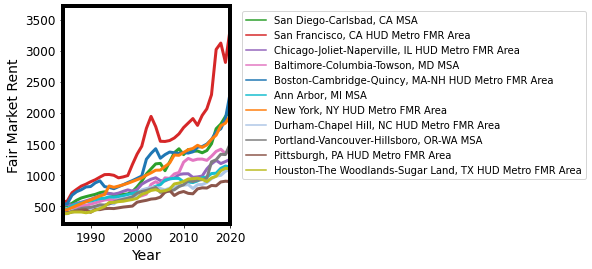

In [30]:
fig, ax = plt.subplots(figsize=(3, 4))
sns.lineplot(
    data=home_prices_regions, x="Year", y="value", hue="areaname22", ax=ax,
    lw=3,
    palette=region_dict,
    legend=True
)
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
ax.set_xlim([1984, 2020])
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel("Fair Market Rent", fontsize=14)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
save_fig(FIGURE_DIR / 'fair-market-rent-legend')